In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [2]:
classifier = Sequential()

### CNN model building

In [3]:
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [4]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_path = r'D:\breakHis project\breakhis 400x\train'
valid_path = r'D:\breakHis project\breakhis 400x\val'
test_path = r'D:\breakHis project\breakhis 400x\test'

In [8]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
val_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1184 images belonging to 2 classes.
Found 338 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


In [9]:
model = classifier.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/20
37/37 [==============================] - 37s 975ms/step - loss: 0.6186 - accuracy: 0.6774 - val_loss: 0.5898 - val_accuracy: 0.6775
Epoch 2/20
37/37 [==============================] - 23s 628ms/step - loss: 0.5611 - accuracy: 0.6959 - val_loss: 0.5069 - val_accuracy: 0.7959
Epoch 3/20
37/37 [==============================] - 27s 745ms/step - loss: 0.5070 - accuracy: 0.8024 - val_loss: 0.4744 - val_accuracy: 0.8166
Epoch 4/20
37/37 [==============================] - 28s 755ms/step - loss: 0.4804 - accuracy: 0.8150 - val_loss: 0.4826 - val_accuracy: 0.7751
Epoch 5/20
37/37 [==============================] - 28s 753ms/step - loss: 0.4951 - accuracy: 0.7686 - val_loss: 0.4568 - val_accuracy: 0.7988
Epoch 6/20
37/37 [==============================] - 27s 743ms/step - loss: 0.5191 - accuracy: 0.7576 - val_loss: 0.5027 - val_accuracy: 0.7456
Epoch 7/20
37/37 [==============================] - 30s 807ms/step - loss: 0.4705 - accuracy: 0.8167 - val_loss: 0.4314 - val_accuracy: 0.8491

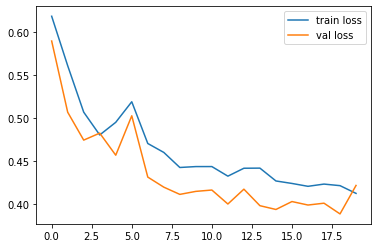

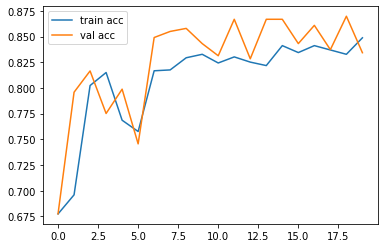

In [10]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc')

In [11]:
# average training accuracy
import numpy as np
np.mean(model.history['accuracy'])

0.807516896724701

In [12]:
# val accuracy
classifier.evaluate(val_set)

11/11 [==============================] - 5s 459ms/step - loss: 0.4216 - accuracy: 0.8343


[0.42163053154945374, 0.834319531917572]

In [13]:
# test accuracy
classifier.evaluate(test_set)

6/6 [==============================] - 4s 686ms/step - loss: 0.4601 - accuracy: 0.8012


[0.4600899815559387, 0.8011695742607117]

In [14]:
test_set.class_indices

{'benign': 0, 'malignant': 1}

In [15]:
y_pred = (classifier.predict(test_set) > 0.5).astype("int32")

6/6 [==============================] - 3s 505ms/step


In [16]:
y_true = test_set.labels

In [17]:
from sklearn.metrics import confusion_matrix, classification_report,matthews_corrcoef
predIdxs = y_pred

print('\n')
print(classification_report(test_set.labels, predIdxs,target_names = ['benign','malignant'], digits=5))

print('\n')
mcc = matthews_corrcoef(y_true,y_pred)
print(f"mcc {mcc}")



              precision    recall  f1-score   support

      benign    0.84375   0.48214   0.61364        56
   malignant    0.79137   0.95652   0.86614       115

    accuracy                        0.80117       171
   macro avg    0.81756   0.71933   0.73989       171
weighted avg    0.80852   0.80117   0.78345       171



mcc 0.5278288561315297
